In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scdna_replication_tools.plot_utils import plot_cell_cn_profile2, get_metacohort_cmaps, get_metacohort_feature_cmap, format_embedding_frame

In [2]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 8

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True

despine_offset = 5
despine_trim = True

In [3]:
# load the features which contain the metadata for all clones included in the metacohort
df = pd.read_csv('scdna_replication_paper/analysis/rt_model/features.csv.gz')
table = pd.read_csv('scdna_replication_paper/data/rt_model_metacohort.tsv', sep='\t')
df.head()

,clone_id,num_cells_s,num_cells_g,dataset,frac_cells_s,frac_cells_g,ploidy,condition,type_GM18507,type_HGSOC,type_OV2295,type_T47D,type_TNBC,type_hTERT,signature_FBI,signature_HRD,signature_TD
0,A,663.0,1159.0,SA039,0.488578,0.794925,2.0,Line,0,0,0,0,0,1,0,0,0
1,B,453.0,165.0,SA039,0.333825,0.113169,2.0,Line,0,0,0,0,0,1,0,0,0
2,C,209.0,129.0,SA039,0.154016,0.088477,2.0,Line,0,0,0,0,0,1,0,0,0
3,D,32.0,5.0,SA039,0.023581,0.003429,2.0,Line,0,0,0,0,0,1,0,0,0
4,A,103.0,47.0,SA906a,0.075292,0.064384,2.0,Line,0,0,0,0,0,1,0,0,0


In [4]:
# drop all the one-hot-encoded columns from df that begin with type_ or signature_ 
df = df.loc[:,~df.columns.str.startswith('type_')]
df = df.loc[:,~df.columns.str.startswith('signature_')]

# drop the cn_path and rt_path columns from table
table = table.drop(['cn_path', 'rt_path', 'condition'], axis=1)

# merge the two dataframes on the dataset column
df = df.merge(table, on='dataset')
df.head()

,clone_id,num_cells_s,num_cells_g,dataset,frac_cells_s,frac_cells_g,ploidy,condition,type,signature
0,A,663.0,1159.0,SA039,0.488578,0.794925,2.0,Line,hTERT,NaN
1,B,453.0,165.0,SA039,0.333825,0.113169,2.0,Line,hTERT,NaN
2,C,209.0,129.0,SA039,0.154016,0.088477,2.0,Line,hTERT,NaN
3,D,32.0,5.0,SA039,0.023581,0.003429,2.0,Line,hTERT,NaN
4,A,103.0,47.0,SA906a,0.075292,0.064384,2.0,Line,hTERT,NaN


In [5]:
cell_type_cmap, signature_cmap, condition_cmap, ploidy_cmap, sample_cmap = get_metacohort_cmaps()
feature_cmap = get_metacohort_feature_cmap()

In [6]:
df['ploidy'].astype(int).value_counts()

2    83
3    29
4    26
5     1
Name: ploidy, dtype: int64

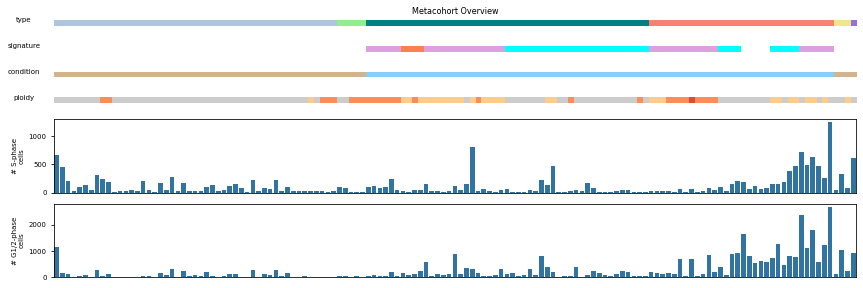

In [7]:
# create a multipanel figure that shows the distribution of the metadata for each dataset
# each column is a different dataset
# the first row shows the 'type' as an annotated colorbar
# the second row shows the 'signature' as an annotated colorbar
# the third row shows the 'condition' as an annotated colorbar
# the fourth row shows 'ploidy' as a heatmap
# the fifth row shows 'num_cells_s' as a barplot
# the sixth row shows 'num_cells_g' as a barplot
# the x-axis labels are the dataset names

# create a figure with 6 rows and 1 column of size 12x4
# have the first 4 rows be half the size as the last 2 rows
fig, ax = plt.subplots(6, 1, figsize=(12, 4), sharex=True, tight_layout=True, gridspec_kw={'height_ratios': [0.2, 0.2, 0.2, 0.2, 1, 1]})

# compress the subplots so that there is no space between them
plt.subplots_adjust(hspace=0)

# first row
# plot the type as a colorbar where each value corresponds to a different color
ax[0].imshow(df['type'].map({'hTERT': 0, 'HGSOC': 1, 'TNBC': 2, 'OV2295': 3, 'T47D': 4, 'GM18507': 5}).to_frame().T, cmap=cell_type_cmap) 
# remove the ytick labels
ax[0].set_yticklabels([])
ax[0].set_yticks([])
# set a y-axis label
ax[0].set_ylabel('type', rotation=0, labelpad=30)

# second row
ax[1].imshow(df['signature'].map({'FBI': 0, 'HRD': 1, 'TD': 2}).to_frame().T, cmap=signature_cmap)
ax[1].set_yticklabels([])
ax[1].set_yticks([])
ax[1].set_ylabel('signature', rotation=0, labelpad=30)

# third row
ax[2].imshow(df['condition'].map({'Line': 0, 'PDX': 1}).to_frame().T, cmap=condition_cmap)
ax[2].set_yticklabels([])
ax[2].set_yticks([])
ax[2].set_ylabel('condition', rotation=0, labelpad=30)

# fourth row
ax[3].imshow(df['ploidy'].astype(int).to_frame().T, cmap=ploidy_cmap)
ax[3].set_yticklabels([])
ax[3].set_yticks([])
ax[3].set_ylabel('ploidy', rotation=0, labelpad=30)

# fifth row
# the x-axis is the index of the dataframe
sns.barplot(x=df.index, y='num_cells_s', data=df, ax=ax[4], color='tab:blue')
ax[4].set_ylabel('# S-phase\ncells')

# sixth row
sns.barplot(x=df.index, y='num_cells_g', data=df, ax=ax[5], color='tab:blue')
ax[5].set_ylabel('# G1/2-phase\ncells')

# remove the subplot borders from the first 4 rows
for i in range(4):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

# remove the xtick labels from all rows
for i in range(6):
    ax[i].set_xticklabels([])
    ax[i].set_xticks([])

# set a title for the entire figure
ax[0].set_title('Metacohort Overview')

# fig.savefig('scdna_replication_paper/plots/rt_model/main_fig_draft_metacohort_overview.pdf', bbox_inches='tight')

plt.show()

### Make a draft of the main figure that just shows the metacohort overview in panel A

In [8]:
def plot_metacohort_overview(df, ax_type, ax_sig, ax_ploidy, ax_cond, ax_sample, ax_s, ax_g):
    # first row
    # plot the type as a colorbar where each value corresponds to a different color
    ax_type.imshow(df['type'].map({'hTERT': 0, 'HGSOC': 1, 'TNBC': 2, 'OV2295': 3, 'T47D': 4, 'GM18507': 5}).to_frame().T, cmap=cell_type_cmap) 
    # set a y-axis label
    ax_type.set_ylabel('type', rotation=0, labelpad=30)

    # second row
    ax_sig.imshow(df['signature'].map({'NaN': 0, 'FBI': 1, 'HRD': 2, 'TD': 3}).to_frame().T, cmap=signature_cmap)
    ax_sig.set_ylabel('signature', rotation=0, labelpad=30)

    # third row
    ax_cond.imshow(df['condition'].map({'Line': 0, 'PDX': 1}).to_frame().T, cmap=condition_cmap)
    ax_cond.set_ylabel('condition', rotation=0, labelpad=30)

    # fourth row
    ax_ploidy.imshow(df['ploidy'].astype(int).to_frame().T, cmap=ploidy_cmap)
    ax_ploidy.set_ylabel('ploidy', rotation=0, labelpad=30)

    # fifth row
    # TODO: create the appropriate map from sample_id to integers
    ax_sample.imshow(df['dataset'].map(df[['dataset']].drop_duplicates().reset_index(drop=True).reset_index().set_index('dataset').to_dict()['index']).to_frame().T, cmap=sample_cmap)
    ax_sample.set_ylabel('sample', rotation=0, labelpad=30)

    # sixth row
    # the x-axis is the index of the dataframe
    sns.barplot(x=df.index, y='num_cells_s', data=df, ax=ax_s, color='tab:blue')
    ax_s.set_ylabel('# S-phase\ncells')

    # seventh row
    sns.barplot(x=df.index, y='num_cells_g', data=df, ax=ax_g, color='tab:blue')
    ax_g.set_ylabel('# G1/2-phase\ncells')

    # remove the subplot borders from the first 4 rows
    # also remove y-axis ticks and tick labels
    for ax in [ax_type, ax_sig, ax_cond, ax_ploidy, ax_sample]:
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # remove the xtick labels from all rows
    for ax in [ax_s, ax_g]:
        sns.despine(ax=ax)
        ax.set_xticklabels([])
        ax.set_xticks([])
    
    ax_g.set_xlabel('clone')
    


In [9]:
clone_embeddings = pd.read_csv('scdna_replication_paper/analysis/rt_model/clone_pca_embeddings.csv.gz')
clone_embeddings['ploidy'] = clone_embeddings['ploidy'].astype(int)
clone_embeddings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,type_HGSOC,type_OV2295,type_T47D,type_TNBC,type_hTERT,signature_FBI,signature_HRD,signature_TD,signature,type
0,22.319514,4.017533,1.734089,-2.979986,-8.201685,12.913889,-11.168185,-6.008291,-1.302448,-7.090029,...,0,1,0,0,0,0,0,0,NaN,OV2295
1,37.664705,10.933306,2.050852,-3.438828,-8.637004,9.833382,-13.518264,-5.054806,-1.309712,-7.039824,...,0,1,0,0,0,0,0,0,NaN,OV2295
2,-44.369960,10.806727,-3.594818,-7.677319,-3.040095,8.013219,-16.749419,-3.190702,4.311441,-8.886560,...,0,1,0,0,0,0,0,0,NaN,OV2295
3,-18.305720,14.805118,-12.865534,-11.603007,-1.528415,9.124139,-16.889585,-12.927147,11.285189,-9.329417,...,0,1,0,0,0,0,0,0,NaN,OV2295
4,8.937907,-2.339258,-7.912034,-9.168265,-5.053090,19.502894,-17.084225,-20.194284,9.395359,-9.448626,...,0,1,0,0,0,0,0,0,NaN,OV2295


In [10]:
def plot_clone_embeddings(clone_embeddings, ax_type, ax_sig, ax_ploidy, s=1):
    cell_type_cdict, signature_cdict, _, ploidy_cdict, _ = get_metacohort_cmaps(return_cdicts=True)
    sns.scatterplot(data=clone_embeddings, x='PC1', y='PC2', hue='type', size='num_cells_s', alpha=0.5, s=s, ax=ax_type, palette=cell_type_cdict)
    # only show the 8th and last elements in the legend
    handles, labels = ax_type.get_legend_handles_labels()
    handles = [handles[8], handles[-1]]
    labels = [labels[8], labels[-1]]
    ax_type.legend(handles, labels, loc='upper right', title='# S cells')
    ax_type.set_title('Clone RT PCA embedding\ncolored by type')

    sns.scatterplot(data=clone_embeddings, x='PC1', y='PC2', hue='ploidy', size='num_cells_s', alpha=0.5, s=s, ax=ax_ploidy, palette=ploidy_cdict)
    ax_ploidy.get_legend().remove()
    ax_ploidy.set_title('Clone RT PCA embedding\ncolored by ploidy')

    sns.scatterplot(data=clone_embeddings, x='PC1', y='PC2', hue='signature', size='num_cells_s', alpha=0.5, s=s, ax=ax_sig, palette=signature_cdict)
    ax_sig.get_legend().remove()
    ax_sig.set_title('Clone RT PCA embedding\ncolored by signature')

    for ax in [ax_type, ax_sig, ax_ploidy]:
        format_embedding_frame(ax, 'PC1', 'PC2')
    

In [11]:
feature_coef_df = pd.read_csv('scdna_replication_paper/analysis/rt_model/clone_pca_regression_coefficients.csv.gz')
feature_coef_df.head()

,feature,coef,PC,log10_abs_coef,metafeature
0,ploidy,-8.706227,PC1,0.939830,ploidy
1,type_GM18507,-6.626555,PC1,0.821288,type
2,type_T47D,-11.087349,PC1,1.044828,type
3,type_hTERT,-30.616855,PC1,1.485961,type
4,type_OV2295,-8.092294,PC1,0.908072,type


In [12]:
def compute_median_and_ci(df, col_prefix_list):
    ''' For each rt profile, compute the median and 95% CI of the posterior distribution. '''
    # initialize empty dataframe
    out_df = pd.DataFrame()
    for col_prefix in col_prefix_list:
        # subset df to just the columns with this prefix
        col_names = [col for col in df.columns if (col.startswith(col_prefix)) or (col in ['chr', 'start', 'end'])]
        temp_df = df[col_names]
        # set chr, start, end as the index
        temp_df = temp_df.set_index(['chr', 'start', 'end'])
        # compute the median and 95% CI of the posterior distribution across all rows in temp_df
        median = temp_df.median(axis=1)
        ci_lower = temp_df.quantile(0.025, axis=1)
        ci_upper = temp_df.quantile(0.975, axis=1)
        median_colname = col_prefix + '_median'
        ci_lower_colname = col_prefix + '_ci_lower'
        ci_upper_colname = col_prefix + '_ci_upper'
        temp_summary_df = pd.DataFrame({median_colname: median, ci_lower_colname: ci_lower, ci_upper_colname: ci_upper}, index=temp_df.index)

        # if out_df is empty, set it equal to temp_summary_df
        if out_df.empty:
            out_df = temp_summary_df
        # otherwise, merge temp_summary_df with out_df
        else:
            out_df = out_df.merge(temp_summary_df, left_index=True, right_index=True)
        
    # reset index so that chr, start, end are now columns
    out_df = out_df.reset_index()

    return out_df

rt_profiles = pd.read_csv('scdna_replication_paper/analysis/rt_model/rt_profile_posteriors.csv.gz')

# list of all the rt profiles that need to be processed
col_prefix_list = ['global_rt', 'ct_hgsoc', 'ct_tnbc', 'ct_htert', 'ct_ov2295', 'ct_t47d', 'ct_gm18507', 'sig_fbi', 'sig_hrd', 'sig_td', 'wgd_rt', 'ngd_rt']

# compute the median and 95% CI of the posterior distribution for each rt profile
rt_profiles = compute_median_and_ci(rt_profiles, col_prefix_list)

# set the chromosome column as a categorical variable
rt_profiles['chr'] = rt_profiles['chr'].astype('str').astype('category')

rt_profiles.head()

/juno/work/shah/users/weinera2/projects/scdna_replication_tools/venv3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,chr,start,end,global_rt_median,global_rt_ci_lower,global_rt_ci_upper,ct_hgsoc_median,ct_hgsoc_ci_lower,ct_hgsoc_ci_upper,ct_tnbc_median,...,sig_hrd_ci_upper,sig_td_median,sig_td_ci_lower,sig_td_ci_upper,wgd_rt_median,wgd_rt_ci_lower,wgd_rt_ci_upper,ngd_rt_median,ngd_rt_ci_lower,ngd_rt_ci_upper
0,1,1500001,2000000,0.013828,0.010987,0.016946,-0.049304,-0.056172,-0.043259,0.016134,...,-0.021250,0.016875,-0.004555,0.039188,0.017750,0.010528,0.024558,0.007720,0.002355,0.013535
1,1,2000001,2500000,0.010054,0.007524,0.012381,-0.058594,-0.067821,-0.049781,-0.002550,...,-0.017198,0.021833,0.000702,0.041737,0.007449,0.000119,0.014954,0.008793,0.001989,0.014247
2,1,3000001,3500000,0.008002,0.005276,0.010758,-0.049115,-0.056189,-0.041643,-0.002013,...,-0.013111,0.032730,0.013944,0.053361,0.008597,0.001933,0.015645,0.004661,-0.000605,0.009768
3,1,4000001,4500000,0.009328,0.006272,0.012665,0.015308,0.006739,0.024665,0.007704,...,0.028912,0.000314,-0.022264,0.023352,0.008525,0.001835,0.016594,0.009135,0.003344,0.015015
4,1,4500001,5000000,0.000150,-0.002371,0.002704,0.017480,0.010872,0.023665,0.005177,...,0.029256,-0.009146,-0.030517,0.014443,0.003397,-0.003078,0.010325,-0.001024,-0.005844,0.004016


In [13]:
def plot_rt_profile_posteriors(rt_profiles, ax_glob, ax_hgsoc, ax_tnbc, ax_htert, ax_fbi, ax_wgd, cmap, chrom_labels_to_remove=[]):

    # list of columns to plot
    col_prefix_list = ['global_rt', 'ct_hgsoc', 'ct_tnbc', 'ct_htert', 'sig_fbi', 'wgd_rt']
    subplots = [ax_glob, ax_hgsoc, ax_tnbc, ax_htert, ax_fbi, ax_wgd]
    
    # plot the RT profiles with the colors corresponding to the column prefix
    for ax, col_prefix in zip(subplots, col_prefix_list):
        if col_prefix.startswith('global'):
            color = cmap['global']
        elif col_prefix.startswith('ct'):
            color = cmap['type']
        elif col_prefix.startswith('sig'):
            color = cmap['signature']
        elif col_prefix.startswith('wgd') or col_prefix.startswith('ngd'):
            color = cmap['ploidy']
        median_colname = col_prefix + '_median'
        ci_lower_colname = col_prefix + '_ci_lower'
        ci_upper_colname = col_prefix + '_ci_upper'
        plot_cell_cn_profile2(ax, rt_profiles, median_colname, cn_field_name=None, max_cn=None,
                            chromosome=None, s=1, squashy=False, color=color, alpha=1,
                            lines=True, label=None, scale_data=False, rawy=True, chrom_labels_to_remove=chrom_labels_to_remove,
                            rasterized=True, min_ci_field_name=ci_lower_colname, max_ci_field_name=ci_upper_colname)
        title = col_prefix.replace('global_rt', 'Global RT').replace('ct_', 'type = ').replace('sig_', 'signature = ').replace('wgd_rt', 'ploidy = WGD').replace('ngd_rt', 'ploidy = NGD')
        title = title.replace('htert', 'hTERT').replace('hgsoc', 'HGSOC').replace('tnbc', 'TNBC').replace('fbi', 'FBI')
        ax.set_title(title)
        ax.set_ylabel('Posterior RT\n<-later | earlier->')

/juno/work/shah/users/weinera2/projects/scdna_replication_tools/venv3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/juno/work/shah/users/weinera2/projects/scdna_replication_tools/venv3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always r

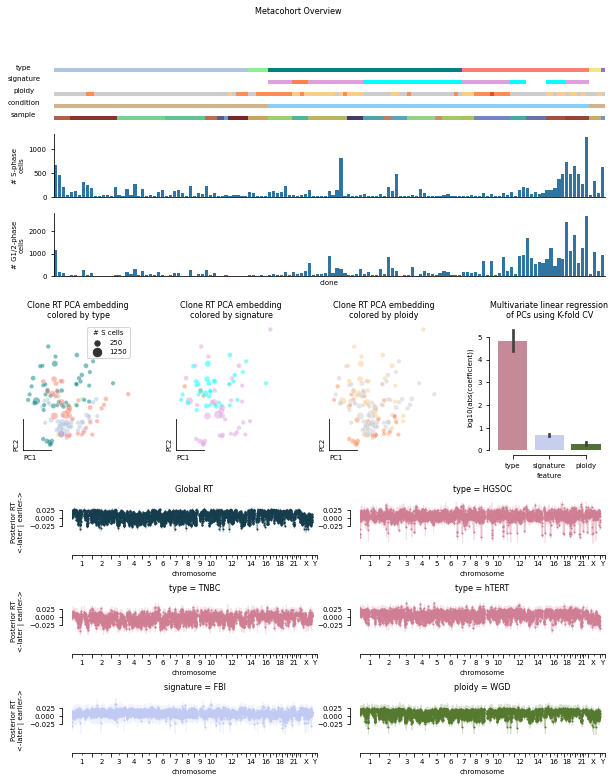

: 

In [15]:
mult_factor = 1.0
fig = plt.figure(figsize=(8.5/mult_factor, 11/mult_factor))

fig.suptitle('Metacohort Overview')

# add four horizontal colorbars at the top to annotate cell type, signature, condition, and ploidy
ax0 = fig.add_axes([0.1, 0.895, 0.9, 0.01])
# ax0.set_title('ax0')
ax1 = fig.add_axes([0.1, 0.88, 0.9, 0.01], sharex=ax0)
# ax1.set_title('ax1')
ax2 = fig.add_axes([0.1, 0.865, 0.9, 0.01], sharex=ax0)
# ax2.set_title('ax2')
ax3 = fig.add_axes([0.1, 0.85, 0.9, 0.01], sharex=ax0)
# ax3.set_title('ax3')
ax35 = fig.add_axes([0.1, 0.835, 0.9, 0.01], sharex=ax0)

# add two barplots that align with the colorbars to show the number of cells in each phase
ax4 = fig.add_axes([0.1, 0.74, 0.9, 0.08], sharex=ax0)
# ax4.set_title('ax4')
ax5 = fig.add_axes([0.1, 0.64, 0.9, 0.08], sharex=ax0)
# ax5.set_title('ax5')

# add four subplots in the middle of the figure
ax6 = fig.add_axes([0.05, 0.42, 0.18, 0.16])
# ax6.set_title('ax6')
ax7 = fig.add_axes([0.3, 0.42, 0.18, 0.16], sharex=ax6, sharey=ax6)
# ax7.set_title('ax7')
ax8 = fig.add_axes([0.55, 0.42, 0.18, 0.16], sharex=ax6, sharey=ax6)
# ax8.set_title('ax8')
ax9 = fig.add_axes([0.82, 0.42, 0.18, 0.16])
# ax9.set_title('ax9')

# add 3 rows and 2 columns of full-genome RT profiles at the bottom of the figure
ax10 = fig.add_axes([0.13, 0.3, 0.4, 0.06])
# ax10.set_title('ax10')
ax11 = fig.add_axes([0.6, 0.3, 0.4, 0.06], sharey=ax10)
# ax11.set_title('ax11')
ax12 = fig.add_axes([0.13, 0.175, 0.4, 0.06], sharey=ax10)
# ax12.set_title('ax12')
ax13 = fig.add_axes([0.6, 0.175, 0.4, 0.06], sharey=ax10)
# ax13.set_title('ax13')
ax14 = fig.add_axes([0.13, 0.05, 0.4, 0.06], sharey=ax10)
# ax14.set_title('ax14')
ax15 = fig.add_axes([0.6, 0.05, 0.4, 0.06], sharey=ax10)
# ax15.set_title('ax15')

plot_metacohort_overview(df, ax0, ax1, ax2, ax3, ax35, ax4, ax5)

plot_clone_embeddings(clone_embeddings, ax6, ax7, ax8)

# make a barplot of the PCA regression coefficients for each feature
sns.barplot(data=feature_coef_df, x='metafeature', y='log10_abs_coef', ax=ax9, palette=feature_cmap, order=['type', 'signature', 'ploidy'])
ax9.set_ylabel('log10(abs(coefficient))')
ax9.set_xlabel('feature')
ax9.set_title('Multivariate linear regression\nof PCs using K-fold CV')
sns.despine(ax=ax9, offset=despine_offset, trim=despine_trim)


# plot the rt profile posteriors in the final 3 columns of the 7th-9th rows
chrom_labels_to_remove = ['11', '13', '15', '17', '19', '20', '22']
plot_rt_profile_posteriors(rt_profiles, ax10, ax11, ax12, ax13, ax14, ax15, feature_cmap, chrom_labels_to_remove=chrom_labels_to_remove)
for ax in [ax11, ax13, ax15]:
    ax.set_ylabel('')


# # draw a dashed lines around the boundaries of the entire figure to know where to crop
# ax_bottom = fig.add_axes([0, 0, 1, 0.01])
# ax_top = fig.add_axes([0, 0.99, 1, 0.01])
# ax_left = fig.add_axes([0, 0, 0.01, 1])
# ax_right = fig.add_axes([0.99, 0, 0.01, 1])
# for ax in [ax_bottom, ax_top, ax_left, ax_right]:
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])


fig.savefig('scdna_replication_paper/plots/rt_model/main_figure.pdf', dpi=300, bbox_inches='tight')

plt.show()